In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [55]:
def VaRHistorical(data, alpha=0.99):
    data['returns'] = data['Close'].diff(1)
    data = data.dropna()
    return data['returns'].quantile(1-alpha)

def VaRAnalytical(data, alpha=0.99):
    data['returns'] = data['Close'].diff(1)
    mean = data['returns'].mean()
    std = data['returns'].std()
    
    return norm.ppf(1-alpha, mean, std)

In [56]:
data = yf.download('AMZN', '2020-01-01', '2022-01-01')
data = data[['Close']]
data

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2020-01-02,94.900497
2020-01-03,93.748497
2020-01-06,95.143997
2020-01-07,95.343002
2020-01-08,94.598503
...,...
2021-12-27,169.669495
2021-12-28,170.660995
2021-12-29,169.201004


Text(0.5, 1.0, 'AMZN')

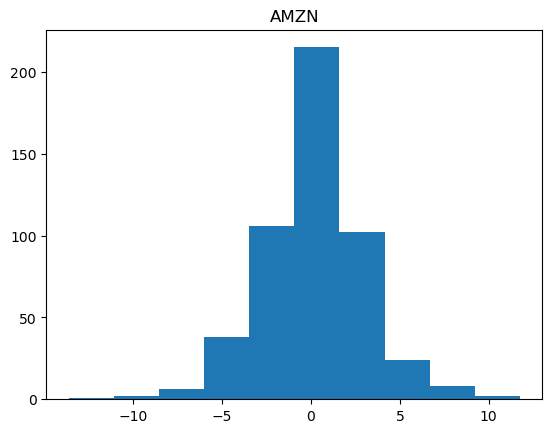

In [62]:
plt.hist(data['Close'].diff(1))
plt.title('AMZN')

In [58]:
alphas = [0.99, 0.95, 0.9]
for alpha in alphas:
    print(f'Alpha: {alpha}, VaR {VaRHistorical(data, alpha)}')

Alpha: 0.99, VaR -7.238203506469726
Alpha: 0.95, VaR -4.674851989746093
Alpha: 0.9, VaR -3.3742095947265627


In [59]:
for alpha in alphas:
    print(f'Alpha: {alpha}, VaR {VaRAnalytical(data, alpha)}')

Alpha: 0.99, VaR -6.547012123559174
Alpha: 0.95, VaR -4.587348505172017
Alpha: 0.9, VaR -3.542659081505112


In [60]:
def expectedShortfall(data, alpha=.99):
    data['returns'] = data['Close'].diff(1)
    std = data['returns'].std()
    mean = data['returns'].mean()
    return norm.ppf(1-alpha)*std - mean

In [61]:
for alpha in alphas:
    print(f'Alpha: {alpha} ES: {expectedShortfall(data, alpha)}')

Alpha: 0.99 ES: -6.8319982259509775
Alpha: 0.95 ES: -4.87233460756382
Alpha: 0.9 ES: -3.8276451838969154


In [63]:
data2 = yf.download('AMD', '2020-01-01', '2022-01-01')
data2 = data2[['Close']]
data2

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2020-01-02,49.099998
2020-01-03,48.599998
2020-01-06,48.389999
2020-01-07,48.250000
2020-01-08,47.830002
...,...
2021-12-27,154.360001
2021-12-28,153.149994
2021-12-29,148.259995


Text(0.5, 1.0, 'AMD')

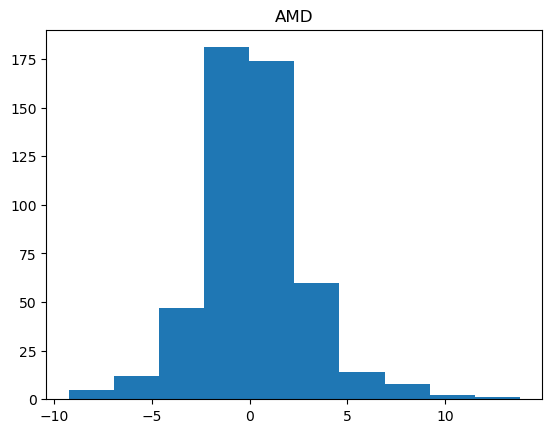

In [65]:
plt.hist(data2['Close'].diff(1))
plt.title('AMD')

In [66]:
for alpha in alphas:
    print(f'Alpha: {alpha}, VaR {VaRHistorical(data2, alpha)}')

Alpha: 0.99, VaR -6.689402313232422
Alpha: 0.95, VaR -4.041002845764159
Alpha: 0.9, VaR -2.7179954528808596
